In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
shooters = pd.read_csv('Data/Stanford_MSA_Database.csv')

OK, so there's lots of things we can do with the dataset given that it's a full 335 rows with 55 columns of descriptive text data each. Let's start by coming up with some basic questions we want answered:
- What kinds of weapons are most popular, and where?
- Where are guns most readily accessible in the country?
- How do warning signs change with age and other factors?
- Does lethality change with age?
- Have shootings become, on the whole, more lethal over time?
- How do the number of fatalities compare to the total number of victims?
- Has the number of guns used in a shooting changed on average over time?
- What happens to the shooter, and how does that change with age and race? Does their fate change substantially in incidences of school shootings?
- How do the motivations of mass shooters differ with geography?
- Does military experience alter the motive?

In [3]:
shooters

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,...,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class,Depreciation,Notes,Edit Date
0,1,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,...,http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK,1,NaN,6/8/2016
1,2,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,...,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS,1,NaN,6/8/2016
2,3,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK,1,NaN,6/22/2016
3,4,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,...,http://www.leagle.com/xmlResult.aspx?page=1&xm...,NaN,NaN,NaN,NaN,Unknown,MS,1,NaN,6/21/2016
4,5,Olean High School,"Olean, New York",Olean,New York,42.081854,-78.432139,3,7,0,...,http://www.newswithviews.com/Erica/Carle10.htm,http://books.google.com/books?id=ZuKoSskEWyIC&...,"""Olean High School Shooting"". Larrie Benton Za...",NaN,NaN,Unknown,MS,1,NaN,6/21/2016
5,6,Los Angeles Computer Learning Center,"Los Angeles, California",Los Angeles,California,34.176221,-118.539954,1,6,1,...,http://www.newspapers.com/newspage/15323499/,NaN,NaN,NaN,NaN,Unknown,MS,1,NaN,6/22/2016
6,7,Cal State Fullerton,"Fullerton, California",Fullerton,California,33.884042,-117.927850,7,2,0,...,http://www.dailytitan.com/2011/11/csuf-massacr...,http://criminalminds.wikia.com/wiki/Edward_All...,http://www.dailytitan.com/2011/11/csuf-massacr...,NaN,NaN,Unknown,MS,1,NaN,6/21/2016
7,8,Grover Cleveland Elementary School,"San Diego, California",San Diego,California,32.863573,-117.128163,2,8,0,...,http://www.examiner.com/article/the-san-diego-...,http://signofthetimes.yuku.com/topic/1258#.Uvb...,https://www.mail-archive.com/seeknfind@ashlist...,NaN,NaN,Unknown,MS,1,NaN,6/22/2016
8,9,University of South Carolina,"Columbia, South Carolina",Columbia,South Carolina,34.050988,-80.820775,2,5,0,...,http://news.google.com/newspapers?nid=1891&dat...,http://news.google.com/newspapers?nid=1338&dat...,NaN,NaN,NaN,Unknown,MS,1,NaN,6/21/2016
9,10,Valley High School,"Las Vegas, Nevada",Las Vegas,Nevada,36.189319,-115.326487,1,2,0,...,http://www.leagle.com/xmlResult.aspx?page=1&xm...,http://news.google.com/newspapers?nid=1345&dat...,http://www.lasvegassun.com/news/1999/apr/23/sl...,NaN,NaN,Unknown,MS,1,NaN,6/21/2016


In [4]:
list(shooters)

['CaseID',
 'Title',
 'Location',
 'City',
 'State',
 'Latitude',
 'Longitude',
 'Number of Civilian Fatalities',
 'Number of Civilian Injured',
 'Number of Enforcement Fatalities',
 'Number of Enforcement Injured',
 'Total Number of Fatalities',
 'Total Number of Victims',
 'Description',
 'Date',
 'Day of Week',
 'Date - Detailed',
 'Shooter Name',
 'Number of shooters',
 'Shooter Age(s)',
 'Average Shooter Age',
 'Shooter Sex',
 'Shooter Race',
 'Type of Gun - Detailed',
 'Type of Gun - General',
 'Number of Shotguns',
 'Number of Rifles',
 'Number of Handguns',
 'Total Number of Guns',
 'Number of Automatic Guns',
 'Number of Semi-Automatic Guns',
 'Fate of Shooter at the scene',
 'Fate of Shooter',
 "Shooter's Cause of Death",
 'School Related',
 'Place Type',
 'Relationship to Incident Location',
 'Targeted Victim/s - Detailed',
 'Targeted Victim/s - General',
 'Possible Motive - Detailed',
 'Possible Motive - General',
 'History of Mental Illness - Detailed',
 'History of Mental

I'm curious what's going to happen if I run a market basket analysis. Let's clean up the data a little more and see what happens. I'm working off of the following tutorial:
http://pbpython.com/market-basket-analysis.html

In [5]:
cleaned_shooters = shooters.copy(deep=True)

#Clean gun types
cleaned_shooters['Type of Gun - General'] = cleaned_shooters['Type of Gun - General'].str.strip()
cleaned_shooters['Type of Gun - General'] = cleaned_shooters['Type of Gun - General'].str.lower()
cleaned_shooters['Type of Gun - General'].unique()

array(['multiple guns', 'handgun', 'shotgun', 'rifle', 'unknown',
       'semi-automatic rifle', '9-mm'], dtype=object)

In [6]:
#Clean gun counts
guncount_types = ['Number of Shotguns','Number of Handguns','Number of Rifles']
for guncount_type in guncount_types:
    cleaned_shooters[guncount_type].replace('Unknown', 0, inplace=True)

In [7]:
#Clean military experience
cleaned_shooters['Military Experience'] = cleaned_shooters['Military Experience'].str.lower()
cleaned_shooters['Military Experience'].replace('yes', True, inplace=True)
cleaned_shooters['Military Experience'].replace(['no', 'unknown'], False, inplace=True)

In [8]:
#Set civilian + law enforcement casualties, injuries to bools
cleaned_shooters['Number of Civilian Fatalities'] = cleaned_shooters['Number of Civilian Fatalities'] > 0
cleaned_shooters['Number of Civilian Injured'] = cleaned_shooters['Number of Civilian Injured'] > 0
cleaned_shooters['Number of Enforcement Fatalities'] = cleaned_shooters['Number of Enforcement Fatalities'] > 0
cleaned_shooters['Number of Enforcement Injured'] = cleaned_shooters['Number of Enforcement Injured'] > 0
cleaned_shooters['High Civilian Casualties'] = (shooters['Number of Civilian Fatalities'] + shooters['Number of Civilian Injured']) > 10

In [9]:
#Corner cases (from errors)
cleaned_shooters['Number of Shotguns'].replace('Handgun', 0, inplace=True)
cleaned_shooters['Number of Rifles'].replace('0 (1)', 0, inplace=True)
cleaned_shooters['Number of Handguns'].replace('2 (1)', 0, inplace=True)

In [10]:
#Set gun types to bools
cleaned_shooters['Number of Shotguns'] = pd.to_numeric(cleaned_shooters['Number of Shotguns']) > 0
cleaned_shooters['Number of Rifles'] = pd.to_numeric(cleaned_shooters['Number of Rifles']) > 0
cleaned_shooters['Number of Handguns'] = pd.to_numeric(cleaned_shooters['Number of Handguns']) > 0

In [11]:
#Clean fate of shooter results
cleaned_shooters['Fate of Shooter'].replace('Custody / Escaped', 'Custody/Escaped', inplace=True)

In [12]:
len(cleaned_shooters.loc[
    (cleaned_shooters['Fate of Shooter'].isnull()) | 
    (cleaned_shooters['Fate of Shooter'] == 'FALSE')
])

3

In [13]:
#Drop the three where we don't know the fate of the shooter
cleaned_shooters = cleaned_shooters.loc[
    (~cleaned_shooters['Fate of Shooter'].isnull()) & 
    ~(cleaned_shooters['Fate of Shooter'] == 'FALSE')
]

In [14]:
#Change 'Unknowns' to 'No' for history of mental illness
cleaned_shooters['History of Mental Illness - General'].replace('Unknown', 'No', inplace=True)

#Change to True/False scheme
cleaned_shooters['History of Mental Illness - General'].replace('Yes', True, inplace=True)
cleaned_shooters['History of Mental Illness - General'].replace('No', False, inplace=True)

In [15]:
#We'll iterate over our desired features and flatten them s.t.
#each unique value has a column, and if the incident has that value
#we'll just assign the matching column a 1 and the other ones a 0
marketbasket = cleaned_shooters[[
    'Number of Civilian Fatalities',
    'Number of Civilian Injured',
    'Number of Enforcement Fatalities',
    'Number of Enforcement Injured',
    'Military Experience',
    'Number of Shotguns',
    'Number of Rifles',
    'Number of Handguns',
    'High Civilian Casualties',
    'History of Mental Illness - General'
]]


#Get the logical inverses as well
marketbasket['No Civilian Fatalities'] = ~marketbasket['Number of Civilian Fatalities']
marketbasket['No Civilian Injured'] = ~marketbasket['Number of Civilian Injured']
marketbasket['No Enforcement Fatalities'] = ~marketbasket['Number of Enforcement Fatalities']
marketbasket['No Enforcement Injured'] = ~marketbasket['Number of Enforcement Injured']
marketbasket['No History of Mental Illness - General'] = ~marketbasket['History of Mental Illness - General']


##TODO: Need to finish generating the rest of the dataframe by expanding out unique values across columns
desired_features = [
    'Fate of Shooter',
    'Possible Motive - General'
]

for feature in desired_features:
    for val in cleaned_shooters[feature].unique():
        marketbasket[feature + ' ' + str(val)] = (cleaned_shooters[feature] == val)

marketbasket

C:\Users\spenc\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\spenc\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\spenc\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,Number of Enforcement Injured,Military Experience,Number of Shotguns,Number of Rifles,Number of Handguns,High Civilian Casualties,History of Mental Illness - General,...,Possible Motive - General Drug use,Possible Motive - General Drug use/Financial difficulties,Possible Motive - General Gender,Possible Motive - General Financial difficulties,"Possible Motive - General Drug use, Robbery",Possible Motive - General Domestic Dispute,Possible Motive - General Social Dispute,Possible Motive - General nan,Possible Motive - General social Dispute,Possible Motive - General Terminated
0,True,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7,True,True,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8,True,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#Apply apriori market basket algorithm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
apriori_res = apriori(marketbasket, min_support=0.1, use_colnames=True)

In [17]:
#Create display copy of apriori results
apriori_res_display = apriori_res.copy(deep=True)
apriori_res_display['itemsets'] = apriori_res_display['itemsets'].apply(lambda x: ''.join(e + ', ' for e in x))

In [18]:
pd.options.display.max_colwidth = 300
apriori_res_display.sort_values('support')

,support,itemsets
437,0.102410,"Number of Civilian Fatalities, Number of Civilian Injured, Number of Handguns, No Enforcement Fatalities, No Enforcement Injured, No History of Mental Illness - General, Fate of Shooter Deceased,"
245,0.102410,"Number of Civilian Fatalities, Number of Civilian Injured, High Civilian Casualties, Fate of Shooter Deceased,"
235,0.102410,"Number of Civilian Fatalities, Number of Civilian Injured, Number of Rifles, Fate of Shooter Deceased,"
232,0.102410,"Number of Civilian Fatalities, Number of Civilian Injured, Number of Shotguns, No Enforcement Injured,"
224,0.102410,"No Enforcement Fatalities, No History of Mental Illness - General, Fate of Shooter Escaped,"
220,0.102410,"No Enforcement Fatalities, No Enforcement Injured, Fate of Shooter Escaped,"
422,0.102410,"Number of Civilian Fatalities, Number of Civilian Injured, Number of Handguns, High Civilian Casualties, No Enforcement Fatalities, No Enforcement Injured,"
184,0.102410,"Number of Rifles, No Enforcement Injured, Fate of Shooter Custody,"
390,0.102410,"Number of Civilian Fatalities, Number of Handguns, No Civilian Injured, No Enforcement Fatalities, No Enforcement Injured,"
182,0.102410,"Number of Rifles, No Enforcement Fatalities, Fate of Shooter Custody,"


In [19]:
num_officers_not_targeted = len(shooters.loc[(shooters['Number of Enforcement Fatalities'] == 0) & (shooters['Number of Enforcement Injured'] == 0)])
print("Officers were injured or killed ", float(len(shooters) - num_officers_not_targeted) / float (len(shooters)), " of the time.")

Officers were injured or killed  0.08358208955223881  of the time.


In [20]:
#Select market basket results with 'Military Experience'
military_apriori = apriori_res.loc[['Military Experience' in elem for elem in apriori_res['itemsets']]]
military_apriori

,support,itemsets
2,0.111446,[Military Experience]
18,0.108434,"[Number of Civilian Fatalities, Military Experience]"


Interesting. Nearly every example of a shooting where they had military experience resulted in no officer casualties. That being said, it looks roughly proportional to the number of shooters without military experience that did/didn't target law enforcement. In other words, military experience doesn't appear to make a significant difference in who they choose to target.

In [21]:
from builtins import any as b_any

#Get motive results, remove ones where we don't know their motive or there are multiple ill-defined motives
motive_apriori = apriori_res.loc[[b_any('Possible Motive - General' in e for e in elem) for elem in apriori_res['itemsets']]]
motive_apriori = motive_apriori[['Possible Motive - General Unknown' not in elem for elem in motive_apriori['itemsets']]]
motive_apriori = motive_apriori[['Possible Motive - General Multiple motives' not in elem for elem in motive_apriori['itemsets']]]
motive_apriori
# motive_apriori.sort_values('support')

""


The market basket analysis gives us the following insights:
- Law enforcement is injured in just ~6.3% of mass shootings; officers die in 3.9% of incidents.
- Officers were neither injured nor killed in 307 out of 335 incidents (91.6%).
    - Is that discrepancy because law enforcement is adequately trained for these kinds of situations?
    - Or is it because the shooters aren't actively targeting law enforcement?
    - I'm guessing the latter, because the analysis points out that a civilian dies in 83.6% of shootings; if they were targeting law enforcement too, they'd probably have a higher 'success' rate
- 11% of the shooters had military experience

In [22]:
#Group the dataset by year
shooters['Date'] = pd.to_datetime(shooters['Date'])
dategroups = shooters.groupby(shooters.Date.dt.year)


#Iterate over groups, count each gun type
for name, grouped in dategroups:
    gun_counts = grouped['Type of Gun - General'].count().transpose()
    print(name)
    print(gun_counts)
    


1966
2
1971
1
1972
1
1974
2
1976
2
1979
2
1982
2
1983
2
1984
3
1985
2
1986
3
1987
1
1988
6
1989
3
1990
1
1991
5
1992
4
1993
9
1994
4
1995
4
1996
3
1997
6
1998
5
1999
7
2000
1
2001
2
2002
2
2003
3
2004
2
2005
3
2006
6
2007
10
2008
6
2009
6
2010
2
2011
6
2012
14
2013
16
2014
13
2015
65
2016
98


In [23]:
from altair import *
chart = Chart(data).mark_area(
    stacked='center',
).encode(
    color=Color('series:N',
        scale=Scale(
            range='category20b',
        ),
    ),
    x=X('date:T',
        axis=Axis(
            axisWidth=0.0,
            format='%Y',
            labelAngle=0.0,
            tickSize=0.0,
        ),
        scale=Scale(
            nice='month',
        ),
        timeUnit='yearmonth',
    ),
    y=Y('sum(count):Q',
        axis=False,
    ),
).configure_cell(
    height=200.0,
    width=300.0,
)

SchemaValidationError: Invalid specification

        altair.vegalite.v2.schema.core.MarkDef, validating 'additionalProperties'

        Additional properties are not allowed ('stacked' was unexpected)
        

Alright, here's an idea: let's look at the density of different types of shootings across the country based on motive first, then other variables.

In [31]:
#Let's start by looking at how many examples there are for each motive
shooters['Possible Motive - General'] = shooters['Possible Motive - General'].str.lower()
motive_groups = shooters.groupby('Possible Motive - General')
for name, group in motive_groups:
    print(name, ": ", len(group))

domestic dispute :  33
drug use :  2
drug use, robbery :  1
drug use/financial difficulties :  2
expulsion/suspension :  5
failure :  6
financial difficulties :  1
financial dispute :  9
gender :  1
harassment :  5
legal dispute :  6
mental illness :  33
multiple motives :  33
political/religious ideals :  11
race :  6
rejection :  7
robbery :  7
social dispute :  44
terminated :  1
terminated/denied/reprimanded :  22
unknown :  98


I suppose it's a blessing that there are too few examples of any one kind of shooting to use. In any event, it means that standard density estimation techniques are out the window, except when considering all examples.

C:\Users\spenc\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\spenc\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


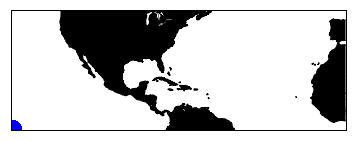

In [41]:
from mpl_toolkits.basemap import Basemap

COLORS=['#1DACE8','#1C366B','#F24D29','#E5C4A1','#C4CFD0']
SELECTED_GROUPS = [
    'social dispute',
    'terminated/denied/reprimanded',
    'domestic dispute',
    'mental illness',
    'political/religious ideals'
]

fig, ax = plt.subplots()
shooter_map = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),
            resolution='l',area_thresh=1000.,projection='merc',
            lat_1=50.,lon_0=-107.,ax=ax)
shooter_map.drawcoastlines()
shooter_map.drawcountries()
shooter_map.fillcontinents(color = 'black')
shooter_map.drawmapboundary()


##TODO: fix the coordinates and map projection

#Plot the shooting motivation groups we've indicated above
color_counter = 0
for name, group in motive_groups:
    if name in SELECTED_GROUPS:
        shooter_map.plot(
            group['Latitude'], 
            group['Longitude'],
#             color=COLORS[color_counter],
            'bo',
            markersize=20
        )
        color_counter += 1

plt.show()